In [1]:
# Import neccesary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

# Step 1: Load/import data

The first step is to load the data on which we want to estimate the noise floor for the different parameters of interest. The parameter of interest here are:

- Sigma, gamma, and beta (these are all parameters for determining the quality of the solution)
- Uncertainty
- Displacements in X and Y directions
- In plane rotation (or rotation parallel to z axis)
- Virtual strain gauge (XX, YY, shear XY)

We are going to store the data in a numpy array object like the one shown below

![](supp_files/NumPy_ndarrays_v2.png)

where the numbers represent values of the parameter of interest, the axis 0 and 1 correspond to the y and x coordinates of the values in the maps, respectively, and the axis 2 to the different images taken.

**Coordinate system and positive rotation**: Image coordinates in DICe are measured from the top left corner of the image with x positive to the right and y positive downward. Rotations are positive clockwise (opposite of the right-hand rule).

the region of interest considered is as follows

![](supp_files/ROI_sample4_lowres.jpg)

the following ``for loop`` automatically finds the DICe output files in a specific folder (stored in the ``path`` variable) and generate several 3D numpy arrays (one per variable of interest). I used the Pandas pivot method to set the coordinate system (x positive to the right in columns and y positive downward as rows).

In [2]:
path = 'raw_data/sample4_ROI_diff/results_ROI_diff/'

# loop to extract the data
count = 1
print('Stacking data...')

for filename in os.listdir(path):
    if filename.startswith('DICe') and filename.endswith('.txt'):
        
        # load the corresponding csv file
        df = pd.read_csv(path + filename, delimiter=',')
        
        # separate the different parameters of interest and reorganize them as a matrix
        sigma = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='SIGMA')
        gamma = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='GAMMA')
        beta = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='BETA')
        uncertainty = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='UNCERTAINTY')
        disp_X = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='DISPLACEMENT_X')
        disp_Y = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='DISPLACEMENT_Y')
        rot_Z = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='ROTATION_Z')
        strainXX = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='VSG_STRAIN_XX')
        strainYY = df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='VSG_STRAIN_YY')
        strainXY= df.pivot(index='COORDINATE_Y', columns='COORDINATE_X', values='VSG_STRAIN_XY')
        
        # generate the numpy arrays
        if count == 1:
            sigma_stack = np.array(sigma)
            gamma_stack = np.array(gamma)
            beta_stack = np.array(beta)
            uncertainty_stack = np.array(uncertainty)
            dispX_stack = np.array(disp_X)
            dispY_stack = np.array(disp_Y)
            rotZ_stack = np.array(rot_Z)
            strainXX_stack = np.array(strainXX)
            strainYY_stack = np.array(strainYY)
            strainXY_stack = np.array(strainXY)
        else:
            sigma_stack = np.dstack((sigma_stack, np.array(sigma)))
            gamma_stack = np.dstack((gamma_stack, np.array(gamma)))
            beta_stack = np.dstack((beta_stack, np.array(beta)))
            uncertainty_stack = np.dstack((uncertainty_stack, np.array(uncertainty)))
            dispX_stack = np.dstack((dispX_stack, np.array(disp_X)))
            dispY_stack = np.dstack((dispY_stack, np.array(disp_Y)))
            rotZ_stack = np.dstack((rotZ_stack, np.array(rot_Z)))
            strainXX_stack = np.dstack((strainXX_stack, np.array(strainXX)))
            strainYY_stack = np.dstack((strainYY_stack, np.array(strainYY)))
            strainXY_stack = np.dstack((strainXY_stack, np.array(strainXY)))
        count += 1
        print('file', filename, 'processed...')

print('Done!')

# remove variables that are not going to be used (to release RAM memory)
del df, count, filename, sigma, gamma, beta, uncertainty, disp_X, disp_Y, rot_Z, strainXX, strainYY, strainXY

Stacking data...
file DICe_solution_000.txt processed...
file DICe_solution_001.txt processed...
file DICe_solution_002.txt processed...
file DICe_solution_003.txt processed...
file DICe_solution_004.txt processed...
file DICe_solution_005.txt processed...
file DICe_solution_006.txt processed...
file DICe_solution_007.txt processed...
file DICe_solution_008.txt processed...
file DICe_solution_009.txt processed...
file DICe_solution_010.txt processed...
file DICe_solution_011.txt processed...
file DICe_solution_012.txt processed...
file DICe_solution_013.txt processed...
file DICe_solution_014.txt processed...
file DICe_solution_015.txt processed...
file DICe_solution_016.txt processed...
file DICe_solution_017.txt processed...
file DICe_solution_018.txt processed...
file DICe_solution_019.txt processed...
file DICe_solution_020.txt processed...
file DICe_solution_021.txt processed...
file DICe_solution_022.txt processed...
file DICe_solution_023.txt processed...
file DICe_solution_024.

For testing purposes, let's plot one of the variables considered. In this case, it will be the _in-plane_ rotation (rotation in the z axis) stored in the array named ``rotZ_stack`` and the time step 3 (index 2). Since in DICe rotations are positive clockwise, purple illustrate clockwise rotations and green the opposite (using the PRGn reversed colormap).

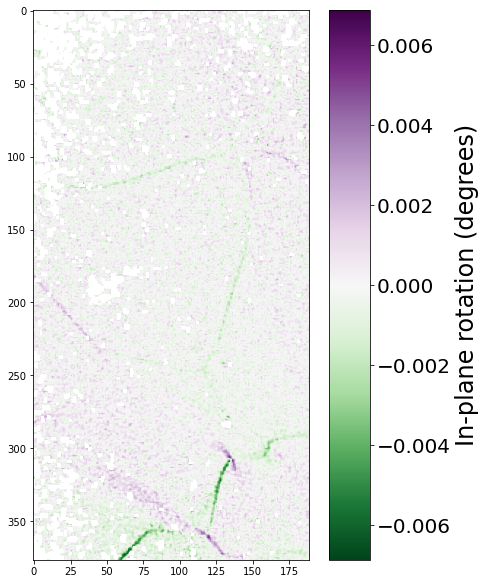

In [3]:
# initialize figure
fig, ax = plt.subplots(constrained_layout=True)

# image (take slice 2 --> [:, :, 1])
im = ax.imshow(rotZ_stack[:, :, 1], cmap='PRGn_r')

# set colorbar limit based on limit values (this centers the colour map at zero == no rotation)
if np.abs(np.nanmin(rotZ_stack[:, :, 1])) >= np.nanmax(rotZ_stack[:, :, 1]):
    im.set_clim(np.nanmin(rotZ_stack[:, :, 1]), np.abs(np.nanmin(rotZ_stack[:, :, 1])))
else:
    im.set_clim(-np.nanmax(rotZ_stack[:, :, 1]), np.nanmax(rotZ_stack[:, :, 1]))

# add the color bar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('In-plane rotation (degrees)', fontsize=24)
cbar.ax.tick_params(labelsize=20)

# Step 2: Generate a numpy array with the equivalent strain

To present the evolution of strain heterogeneities it is convenient to visualize the local strain by combining different components of the strain (XX, YY, XY) of the observed surface. For this we use the Von Mises 2D equivalent strain $\varepsilon_{eq}$ that can be estimated from the VSG strains using

$$
\varepsilon_{eq} = \sqrt{\frac{2}{3} \left( \varepsilon_{xx}^2 + \varepsilon_{yy}^2 + 2\varepsilon_{xy}^2 \right) }
$$

In [4]:
def VM_eq_strain(strain_xx, strain_yy, strain_xy):
    """ Estimate and plot the Von Mises 2D equivalent strain.

    Parameters
    ----------
    strain_xx : 2-dim numpy array
        The xx Green-Lagrange (VSG) strain component
    strain_yy : 2-dim numpy array
        The yy Green-Lagrange (VSG) strain component
    strain_xy : 2-dim numpy array
        The xy (shear) Green-Lagrange (VSG) strain component
    """

    return np.sqrt((2 / 3) * (strain_xx**2 + strain_yy**2 + 2 * strain_xy**2))

# vectorize the function for easy use with numpy arrays
vect_eq_strain = np.vectorize(VM_eq_strain)

In [5]:
# create the array with the equivalent strain
eq_strain = vect_eq_strain(strainXX_stack, strainYY_stack, strainXY_stack)

print("Shape of the 'eq_strain' array:", eq_strain.shape)

Shape of the 'eq_strain' array: (377, 189, 99)


For testing purposes, plot the equivalent strain for the first four steps of time

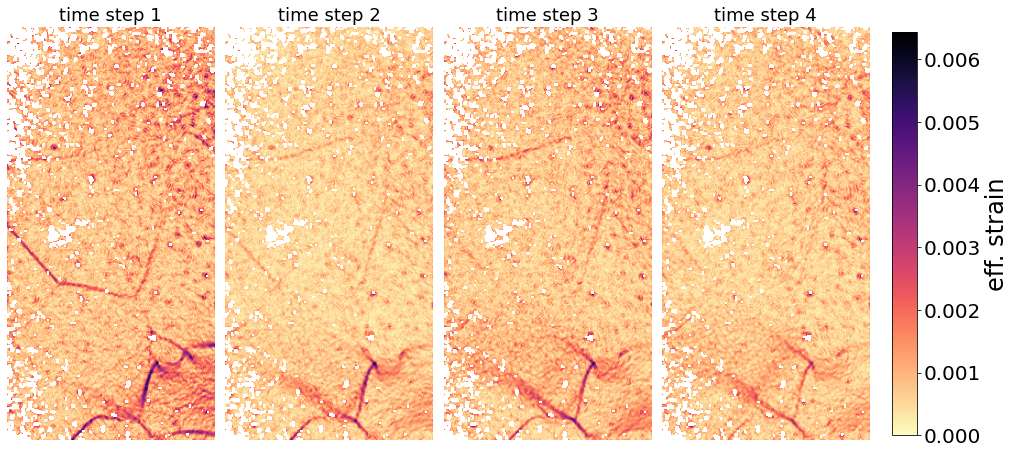

In [6]:
# initialize a 1x4 figure
fig2, axes = plt.subplots(ncols=4, sharey=True, figsize=(14, 8), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    ax.set_axis_off()
    im = ax.imshow(eq_strain[:, :, index], cmap='magma_r')
    ax.set_title(f'time step {index + 1}', fontsize=18)

# add color bar
cbar = fig2.colorbar(im, ax=axes, shrink=0.7, location='right')
cbar.set_label('eff. strain', fontsize=24)
cbar.ax.tick_params(labelsize=20)

Make a plot comparing VSG XX, YY, XY and equivalent stress for the time step 1

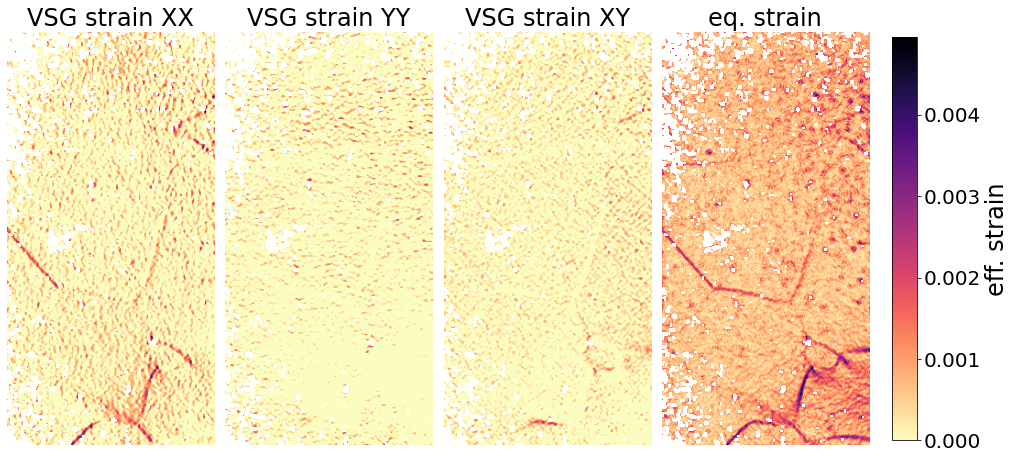

In [7]:
to_plot = [strainXX_stack[:, :, 0],
           strainYY_stack[:, :, 0],
           strainXY_stack[:, :, 0],
           eq_strain[:, :, 0]]

names = ['VSG strain XX', 'VSG strain YY', 'VSG strain XY', 'eq. strain']

# initialize figure
fig3, axes = plt.subplots(ncols=4, sharey=True, figsize=(14, 8), constrained_layout=True)

# plot all maps with the same colorscale (i.e. same cmin and vmax values)
for index, ax in enumerate(axes.flat):
    ax.set_axis_off()
    im = ax.imshow(to_plot[index], vmin=0, vmax=np.nanmax(eq_strain[:, :, 0]), cmap='magma_r')
    ax.set_title(names[index], fontsize=24)
    ax.set_aspect('equal')

# add color bar
cbar = fig3.colorbar(im, ax=axes, shrink=0.7, location='right')
cbar.set_label('eff. strain', fontsize=24)
cbar.ax.tick_params(labelsize=20)

### Generate an array with the cumulative equivalent strain

In [8]:
# create a cumulative (finite) equivalent strain
finite_eq_strain = np.cumsum(eq_strain, axis=2)

In [9]:
finite_eq_strain.shape

(377, 189, 99)

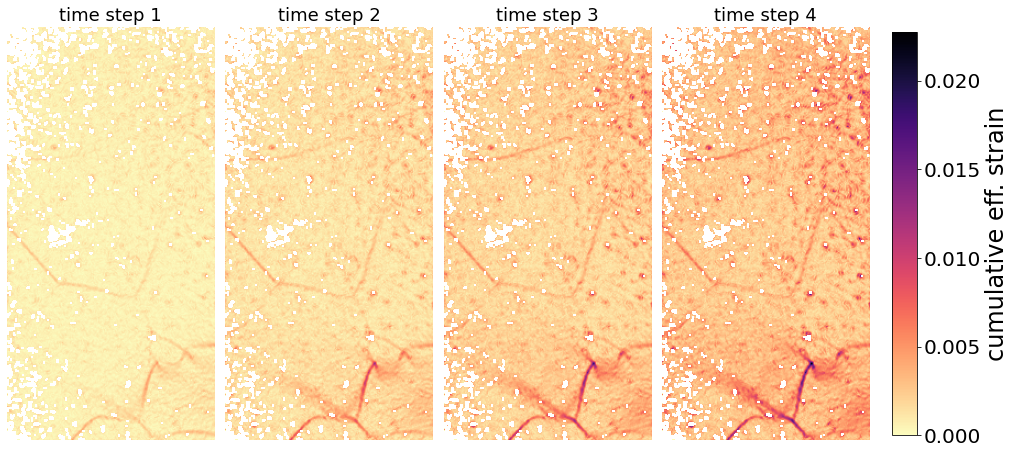

In [10]:
# initialize a 1x4 figure
figA, axes = plt.subplots(ncols=4, sharey=True, figsize=(14, 8), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    ax.set_axis_off()
    im = ax.imshow(finite_eq_strain[:, :, index], vmax=np.nanmax(finite_eq_strain[:, :, -1]), cmap='magma_r')
    ax.set_title(f'time step {index + 1}', fontsize=18)

# add color bar
cbar = figA.colorbar(im, ax=axes, shrink=0.7, location='right')
cbar.set_label('cumulative eff. strain', fontsize=24)
cbar.ax.tick_params(labelsize=20)

## Step 3: Normalize the equivalent strain using the average strain

Equivalent strain normalization serves to illustrate which parts of the region of interest develop strain above and below the average strain value. The first thing to do is to check what type of distribution presents the variable in question in order to choose a suitable average. Generally speaking, if normal-like we should use the arithmetic mean but if lognormal-like we should use the median or the geometric mean instead.

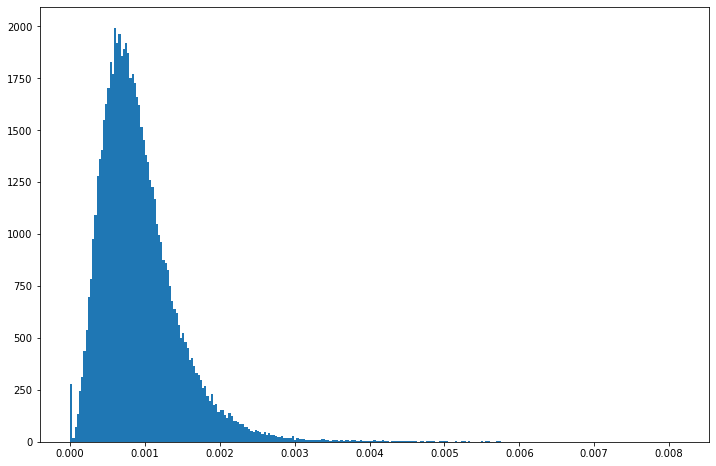

In [11]:
# plot an histogram of one of the slices of the equivalent strain (_ = ... hides the output)
_ = plt.hist(eq_strain[:, :, 1].flatten(), bins='auto')  # 'auto' uses the Freedman-Diaconis rule to estimate the number of bins

The distribution is clearly asymmetric and in particular lognormal-like, although there are some zero values that break the lognormal-like assumption. Due to this I will use the median over the geometric mean as the latter does not allow zero values. More specifically I will use the ``nanmedian`` method to ignore the ``nan`` values in the dataset.

To estimate the normalized equivalent strain maintaining for every time step we have to normalize over the ``axis=2`` (y, x, time steps) then we need take all the values of axis 0 and 1 and estimate the median along axis 2 by dividing the whole array using numpy broadcasting rules*.

> *When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works its way forward. Two dimensions are compatible when (i) they are equal, or (ii) one of them is 1.

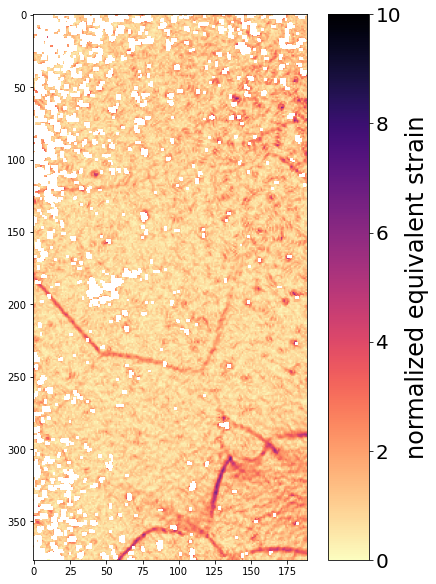

In [12]:
# Estimate the normalized equivalent strain using numpy broadcasting (377 x 189 x 99) / (99,)
norm_effStrain = eq_strain / np.nanmedian(eq_strain, axis=[0, 1])

# initialize figure
fig4, ax = plt.subplots(constrained_layout=True)

# image (take slice 1 --> [:, :, 0])
im = ax.imshow(norm_effStrain[:, :, 0], vmin=0, vmax=10, cmap='magma_r')

# add color bar
cbar = fig4.colorbar(im, ax=ax)
cbar.set_label('normalized equivalent strain', fontsize=24)
cbar.ax.tick_params(labelsize=20)

Now, let's plot the same in a logarithmic color scales so that values below (< 1) and above (> 1) the average strain shown in blue and red respectively.

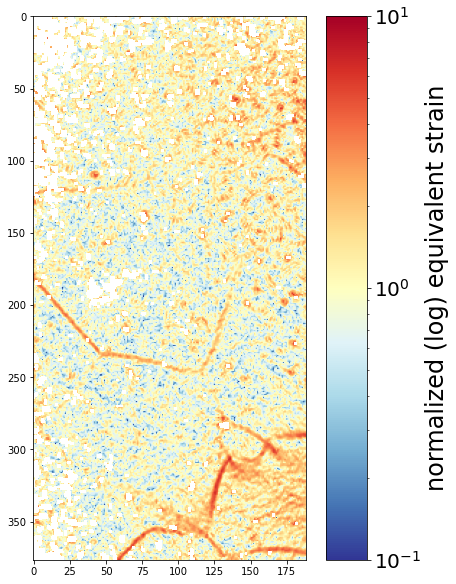

In [13]:
import matplotlib.colors as colors

fig5, ax = plt.subplots(constrained_layout=True)

im = ax.imshow(norm_effStrain[:, :, 0], norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')

# add color bar
cbar = fig5.colorbar(im, ax=ax)
cbar.set_label('normalized (log) equivalent strain', fontsize=24)
cbar.ax.tick_params(labelsize=20)

In [14]:
(np.nanmedian(eq_strain, axis=[0, 1])).shape

(99,)

In [15]:
(eq_strain / np.nanmedian(eq_strain, axis=[0, 1])).shape

(377, 189, 99)

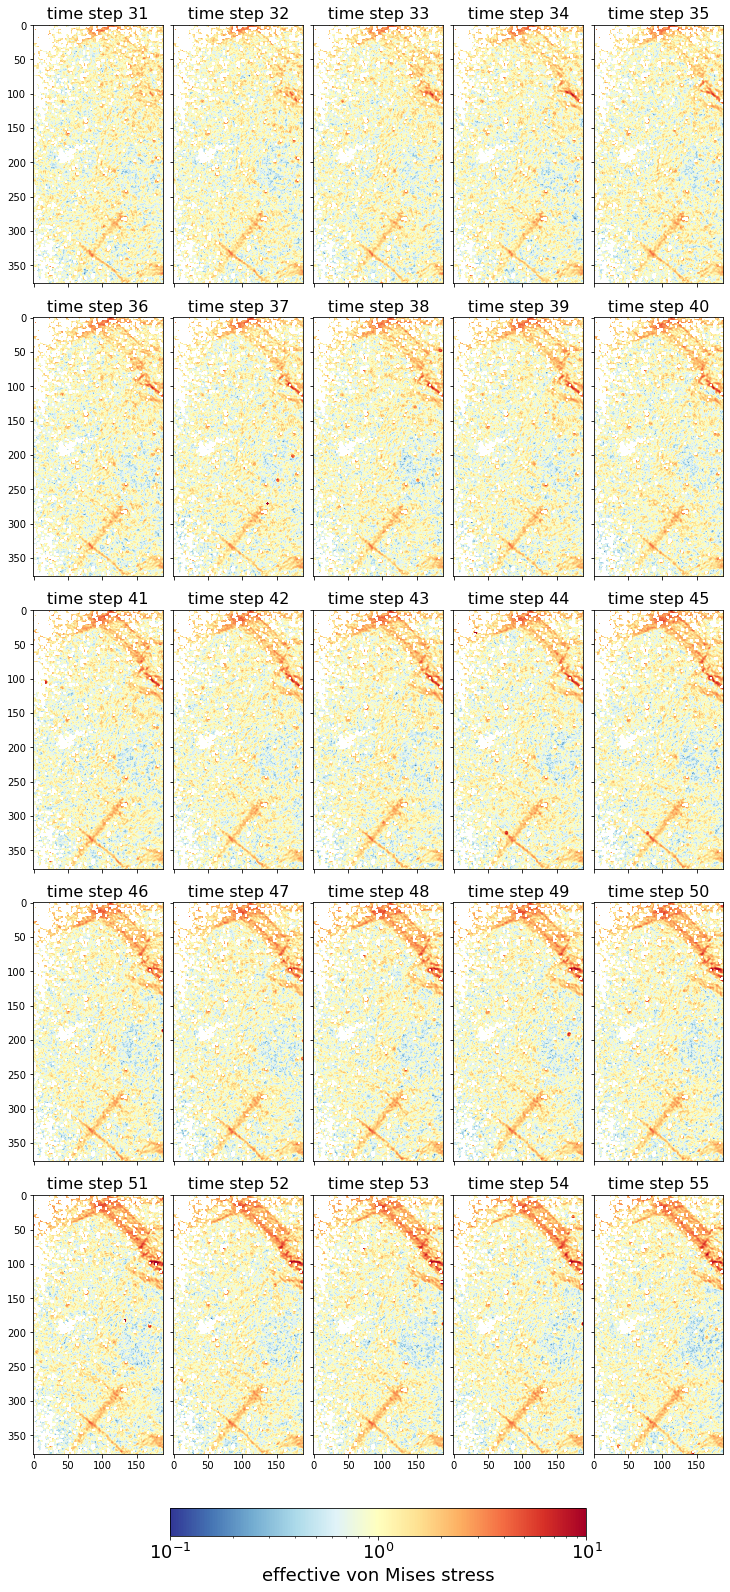

In [16]:
# initialize figure
fig6, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(10, 22), constrained_layout=True)

for index, ax in enumerate(axes.flat):
    im = ax.imshow(norm_effStrain[:, :, index + 30], norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')
    ax.set_title(f'time step {index + 31}', fontsize=16)
    ax.set_aspect('equal')

# add color bar
cbar = fig6.colorbar(im, ax=axes, shrink=0.6, location='bottom')
cbar.set_label('effective von Mises stress', fontsize=18)
cbar.ax.tick_params(labelsize=18)

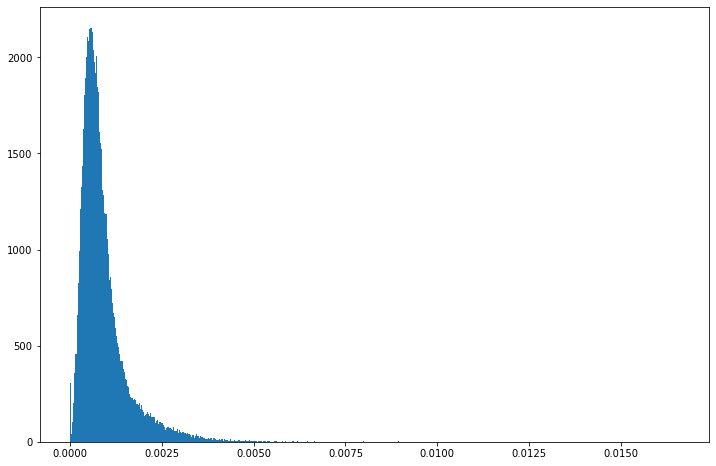

In [17]:
_ = plt.hist(eq_strain[:, :, 80].flatten(), bins='auto')

## Using convolution (from astropy) to fill and smooth the data

In [18]:
from astropy.convolution import Gaussian2DKernel, Box2DKernel
from astropy.convolution import convolve

# set the kernel. By default the Gaussian2DKernel uses a 9x9 array kernel
kernel = Gaussian2DKernel(x_stddev=1.2)
kernel2 = Box2DKernel(width=3)
astropy_conv = convolve(norm_effStrain[:, :, 0], kernel)
astropy_conv2 = convolve(norm_effStrain[:, :, 0], kernel2)

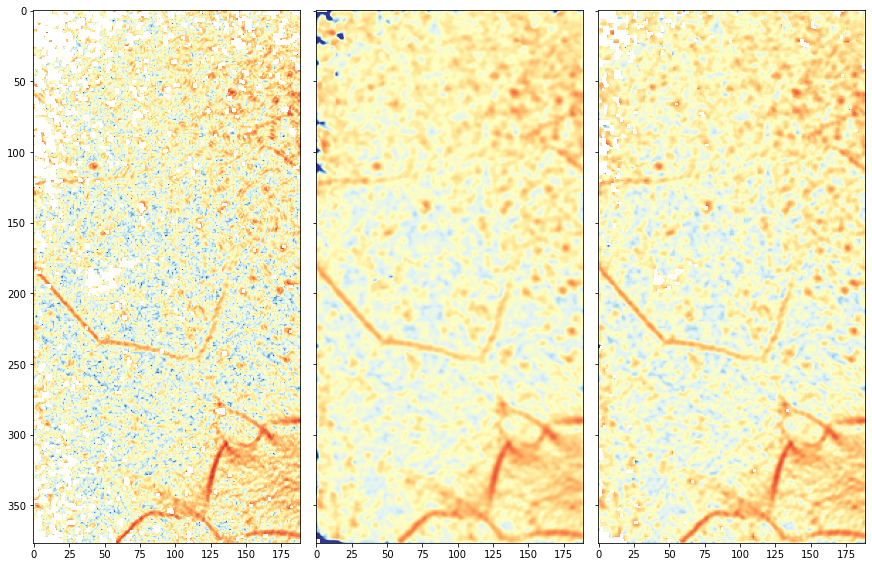

In [19]:
fig7, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, constrained_layout=True)

ax1.imshow(norm_effStrain[:, :, 0], norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')
ax2.imshow(astropy_conv, norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')
ax3.imshow(astropy_conv2, norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')

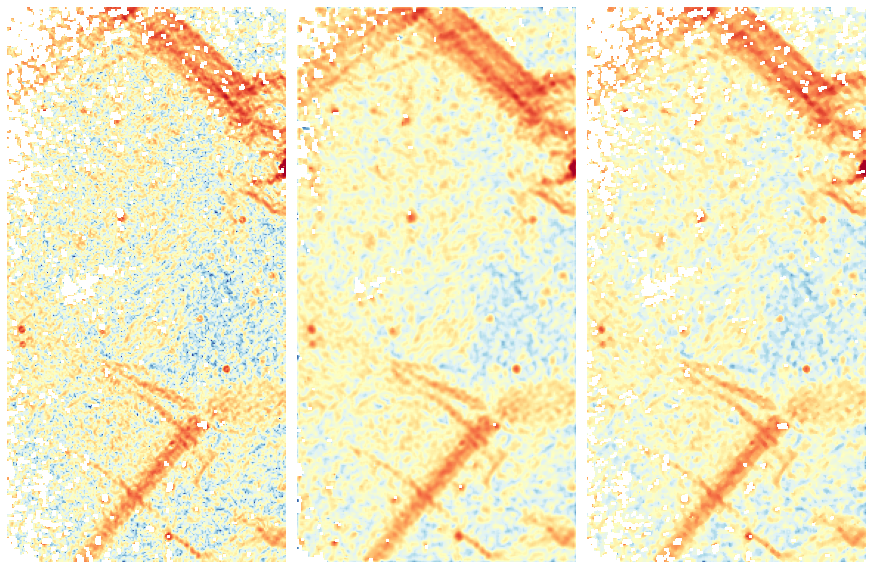

In [20]:
from scipy.signal import medfilt

astropy_conv = convolve(norm_effStrain[:, :, 70], kernel2)
scipy_conv = medfilt(norm_effStrain[:, :, 70], [3, 3])  # use a median filter with a 3x3 kernel

fig8, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, constrained_layout=True)

ax1.imshow(norm_effStrain[:, :, 70], norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')
ax2.imshow(astropy_conv, norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')
ax3.imshow(scipy_conv, norm=colors.LogNorm(vmin=1e-1, vmax=10), cmap='RdYlBu_r')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()